# Goals: 
Membuat model data reduction dengan menggunakan PCA (Principle Componen Analysis), dengan ketentuan sebagai berikut:
1. Buatlah dataFrame dengan jumlah fiture 15 
2. Generate dataFrame dengan bilangan float secara random antara 0 dan 1, serta buat n_component berjumlah 2.
3. Membuat Label A, B, C dan D (masing-masing jumlah 150 data), kemudian lanjutkan proses reduksi data model PCA sampai dengan visualisasi data dalam bentuk plot


Berikut daftar library yang akan digunakan pada projek ini

In [ ]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Membuat dataframe dengan jumlah fitur (kolom) sebanyak 15 dengan bilangan float acak (random) yang bernilai dari range 0 sampai dengan 1 serta membuat kolom label yang terdiri dari 4 kategori yaitu A, B, C, dan D.

In [ ]:
data = {'feature_1': [random.uniform(0, 1) for i in range(150)],
        'feature_2': [random.uniform(0, 1) for i in range(150)],
        'feature_3': [random.uniform(0, 1) for i in range(150)],
        'feature_4': [random.uniform(0, 1) for i in range(150)],
        'feature_5': [random.uniform(0, 1) for i in range(150)],
        'feature_6': [random.uniform(0, 1) for i in range(150)],
        'feature_7': [random.uniform(0, 1) for i in range(150)],
        'feature_8': [random.uniform(0, 1) for i in range(150)],
        'feature_9': [random.uniform(0, 1) for i in range(150)],
        'feature_10': [random.uniform(0, 1) for i in range(150)],
        'feature_11': [random.uniform(0, 1) for i in range(150)],
        'feature_12': [random.uniform(0, 1) for i in range(150)],
        'feature_13': [random.uniform(0, 1) for i in range(150)],
        'feature_14': [random.uniform(0, 1) for i in range(150)],
        'feature_15': [random.uniform(0, 1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C','D']) for i in range(150)]}

Berikut adalah hasil dataframe yang sudah dibuat pada langkah sebelumnya

In [ ]:
df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.131115,0.974175,0.485288,0.826996,0.250268,0.218537,0.646346,0.818505,0.938538,0.052383,0.807527,0.482554,0.264935,0.188888,0.291987,D
1,0.031108,0.291103,0.101967,0.007938,0.396913,0.479822,0.720015,0.650192,0.926933,0.215916,0.465928,0.595454,0.039036,0.040747,0.447126,A
2,0.006940,0.858035,0.592973,0.871062,0.360890,0.702259,0.241985,0.683487,0.069327,0.186358,0.641162,0.431626,0.705180,0.668610,0.721087,D
3,0.119408,0.972526,0.401355,0.560954,0.655615,0.124760,0.483819,0.830308,0.718355,0.592666,0.403259,0.547320,0.202712,0.488764,0.640944,D
4,0.567135,0.033659,0.003591,0.809002,0.300766,0.185489,0.509083,0.073348,0.134424,0.370752,0.613501,0.907633,0.711283,0.424212,0.422919,B


Membuat variabel x yang berisi seluruh baris dari kolom feature_1 sampai dengan feature_15

In [ ]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10','feature_11','feature_12','feature_13','feature_14','feature_15']
x = df.loc[:, features].values

Membuat variabel y yang berisi label data yaitu A, B, C, dan D

In [ ]:
y = df.loc[:,['label']].values

In [ ]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.131115,0.974175,0.485288,0.826996,0.250268,0.218537,0.646346,0.818505,0.938538,0.052383,0.807527,0.482554,0.264935,0.188888,0.291987
1,0.031108,0.291103,0.101967,0.007938,0.396913,0.479822,0.720015,0.650192,0.926933,0.215916,0.465928,0.595454,0.039036,0.040747,0.447126
2,0.006940,0.858035,0.592973,0.871062,0.360890,0.702259,0.241985,0.683487,0.069327,0.186358,0.641162,0.431626,0.705180,0.668610,0.721087
3,0.119408,0.972526,0.401355,0.560954,0.655615,0.124760,0.483819,0.830308,0.718355,0.592666,0.403259,0.547320,0.202712,0.488764,0.640944
4,0.567135,0.033659,0.003591,0.809002,0.300766,0.185489,0.509083,0.073348,0.134424,0.370752,0.613501,0.907633,0.711283,0.424212,0.422919


PCA (Principal Component Analysis) adalah teknik untuk mengurangi dimensi dataset sambil mempertahankan sebanyak mungkin variasi (informasi) dari data aslinya.

#### pca.fit_transform(x):
- fit(): Menganalisis dataset x untuk menemukan komponen utama (principal components).
- transform(): Mengonversi dataset x ke dalam ruang baru berdasarkan komponen utama tersebut.
- Gabungan fit_transform(x) melakukan kedua proses dalam satu langkah.
#### principalComponents:
- Variabel ini menyimpan hasil transformasi dataset x ke dalam komponen utama.
- Hasilnya adalah array numpy dengan dimensi yang lebih kecil yaitu dari sebelumnya 15 kolom, menjadi 2 kolom.

In [ ]:
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

Berikut perintah untuk mengetahui jumlah baris dan kolom setelah dilakukan reduksi dimensi dengan PCA

In [ ]:
principalComponents.shape

(150, 2)

Hasil diatas menunjukkan bahwa baris data sebanyak 150 baris dengan jumlah kolom sebanyak 2

Berikut adalah perintah untuk membuat dataframe menggunakan data hasil PCA dengan mengubah nama kolomnya menjadi 'principal component 1', 'principal component 2'

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.007491,-0.444810
1,-0.253412,0.292176
2,0.341355,0.060315
3,0.277169,-0.047776
4,0.317780,0.399927


In [ ]:
df[['label']].head()

,label
0,D
1,A
2,D
3,D
4,B


Berikut adalah hasil penggabungan data

In [ ]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,-0.007491,-0.444810,D
1,-0.253412,0.292176,A
2,0.341355,0.060315,D
3,0.277169,-0.047776,D
4,0.317780,0.399927,B


Membuat visualisasi data dengan menggunakan scatterplot beserta warna untuk masing-masing kategori

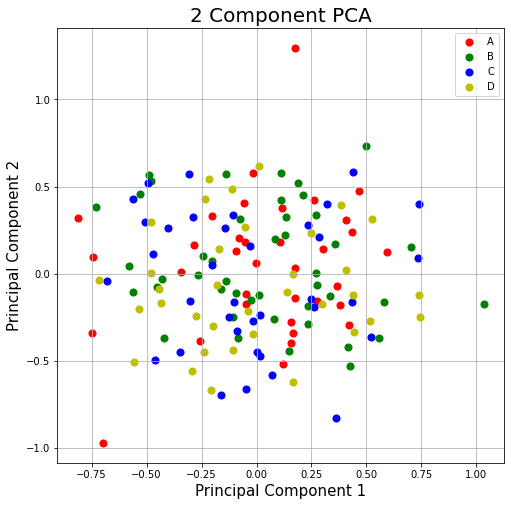

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C','D']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()